In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle
import numpy as np
import ipywidgets as widgets

In [2]:
# Load the dataset
dataset = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

# Create a copy of the dataset for transformation
dataset_transformed = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset_transformed.drop('Churn_Yes', axis=1)
y = dataset_transformed['Churn_Yes']

# Initialize the SelectKBest with f_classif
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k_best.fit_transform(X, y)

# Get the selected feature indices and names
selected_features_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print("Selected Feature Indices:\n", selected_features_indices)
print("Selected Features:\n", selected_features)

# Create the final feature and target datasets with selected features
X_final = X[selected_features]
y_final = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=0)

# Apply SMOTE to the training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Dictionary to store models
models = {
    "Random Forest": RandomForestClassifier(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)

Selected Feature Indices:
 [   0    3    5    6   10   11   13 3299 3300 3301]
Selected Features:
 Index(['Age', 'Customer_Support_Interactions', 'Customer_Satisfaction',
       'Purchase_Frequency', 'Lifetime_Value', 'Average_Order_Value',
       'Number_of_Product_Categories_Purchased',
       'Loyalty_Program_Participation_Inactive',
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium'],
      dtype='object')

Random Forest
Confusion Matrix:
 [[17143    44]
 [    0  6589]]
Accuracy: 0.9981493943472409
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17187
           1       0.99      1.00      1.00      6589

    accuracy                           1.00     23776
   macro avg       1.00      1.00      1.00     23776
weighted avg       1.00      1.00      1.00     23776


Logistic Regression
Confusion Matrix:
 [[17112    75]
 [    0  6589]]
Accuracy: 0.9968455585464334
Classification 

In [8]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_final, y_final, cv=5)
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Random Forest - Cross-Validation Accuracy: 0.9981 (+/- 0.0003)


C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Logistic Regression - Cross-Validation Accuracy: 0.9682 (+/- 0.0013)
Decision Tree - Cross-Validation Accuracy: 0.9965 (+/- 0.0003)
K-Nearest Neighbors - Cross-Validation Accuracy: 0.7520 (+/- 0.0007)
Support Vector Machine - Cross-Validation Accuracy: 0.7361 (+/- 0.0010)
Gradient Boosting - Cross-Validation Accuracy: 0.9980 (+/- 0.0003)
Naive Bayes - Cross-Validation Accuracy: 0.9836 (+/- 0.0004)


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
dataset = pd.read_csv("cleaned_df_luxottica_churn_updated_0108.csv", index_col=None)

# Create a copy of the dataset for transformation
dataset_transformed = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset_transformed.drop('Churn_Yes', axis=1)
y = dataset_transformed['Churn_Yes']

# Initialize the SelectKBest with f_classif
from sklearn.feature_selection import SelectKBest, f_classif
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = select_k_best.fit_transform(X, y)

# Get the selected feature indices and names
selected_features_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print("Selected Feature Indices:\n", selected_features_indices)
print("Selected Features:\n", selected_features)

# Create the final feature and target datasets with selected features
X_final = X[selected_features]
y_final = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=0)

# Dictionary of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Evaluate on the training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Evaluate on the testing set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
        "Classification Report": classification_report(y_test, y_test_pred)
    }
    print(f"{name} - Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")
    print(f"Confusion Matrix:\n{results[name]['Confusion Matrix']}")
    print(f"Classification Report:\n{results[name]['Classification Report']}\n")

# You can also store or print the results as needed.


Selected Feature Indices:
 [   0    3    5    6   10   11   13 3299 3300 3301]
Selected Features:
 Index(['Age', 'Customer_Support_Interactions', 'Customer_Satisfaction',
       'Purchase_Frequency', 'Lifetime_Value', 'Average_Order_Value',
       'Number_of_Product_Categories_Purchased',
       'Loyalty_Program_Participation_Inactive',
       'Engagement_with_Promotions_Low', 'Engagement_with_Promotions_Medium'],
      dtype='object')
Random Forest - Training Accuracy: 1.0000, Testing Accuracy: 0.9981
Confusion Matrix:
[[17143    44]
 [    0  6589]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17187
           1       0.99      1.00      1.00      6589

    accuracy                           1.00     23776
   macro avg       1.00      1.00      1.00     23776
weighted avg       1.00      1.00      1.00     23776


Logistic Regression - Training Accuracy: 0.9975, Testing Accuracy: 0.9974
Confusion Matrix:



Random Forest
ROC-AUC Score: 0.9997352601691712


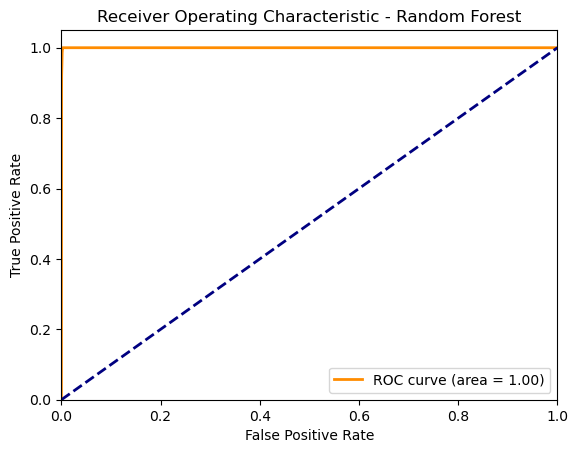


Logistic Regression
ROC-AUC Score: 0.9998826881255296


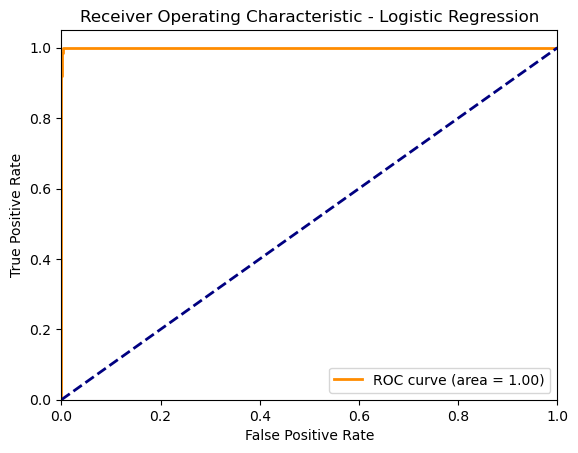


Decision Tree
ROC-AUC Score: 0.9968633445056447


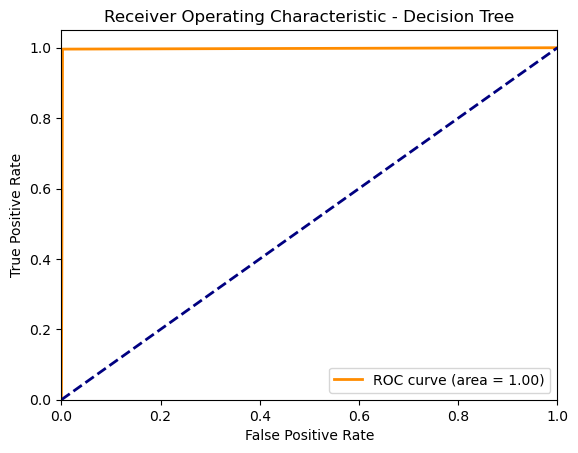


K-Nearest Neighbors
ROC-AUC Score: 0.997457626063486


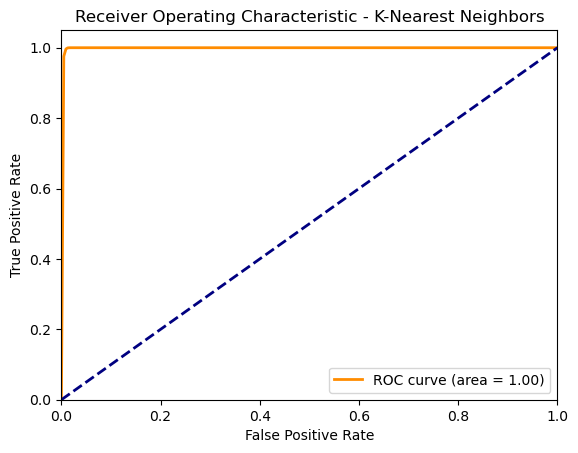


Support Vector Machine
ROC-AUC Score: 0.9998635703078232


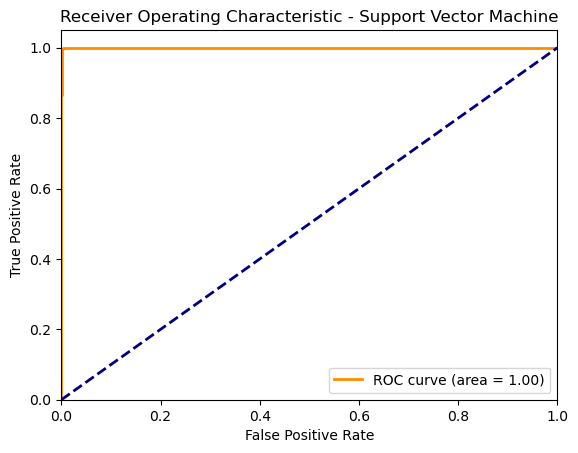


Gradient Boosting
ROC-AUC Score: 0.999928036648777


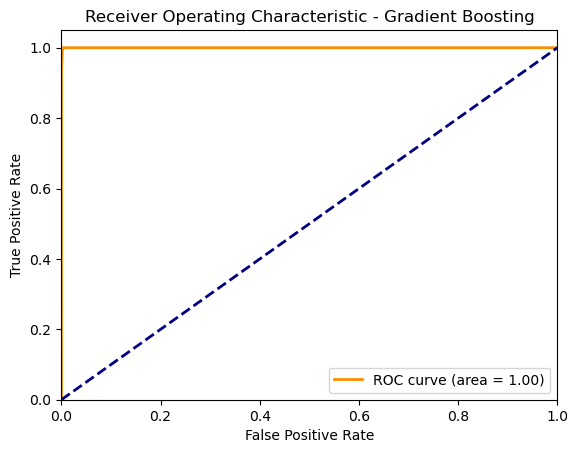


Naive Bayes
ROC-AUC Score: 0.9980684911140074


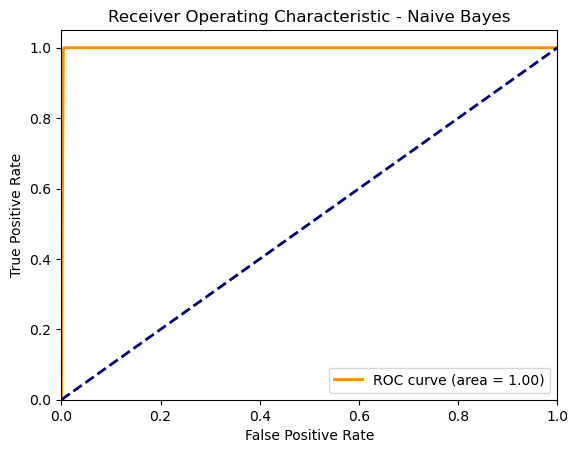

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    else:
        y_prob = model.decision_function(X_test)  # For models that use decision function instead

    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Display ROC-AUC Score
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


In [ ]:
\